## Music Popularity Prediction Project
In this notebook, I will be analyzing pre-collected music data from the Spotify API, focusing on predicting the 'Popularity' of each track. Using this data, I will build predictive models to accurately estimate the popularity index for each song. 

1) Loading the dataset to get the music data

In [1]:
import pandas as pd 

df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Reducing the dataset so that it only contains 500 tracks for each genre instead of 1000 tracks (due to memory issue)

In [2]:
df_new = df.groupby('track_genre').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

len(df_new) 

11400

In [3]:
df_new['track_genre'].value_counts()

track_genre
acoustic             100
punk                 100
progressive-house    100
power-pop            100
pop-film             100
                    ... 
folk                 100
emo                  100
electronic           100
electro              100
world-music          100
Name: count, Length: 114, dtype: int64

2. Data Exploration

In [4]:
df_new.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
len(df_new)

11400

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400 entries, 0 to 11399
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11400 non-null  int64  
 1   track_id          11400 non-null  object 
 2   artists           11400 non-null  object 
 3   album_name        11400 non-null  object 
 4   track_name        11400 non-null  object 
 5   popularity        11400 non-null  int64  
 6   duration_ms       11400 non-null  int64  
 7   explicit          11400 non-null  bool   
 8   danceability      11400 non-null  float64
 9   energy            11400 non-null  float64
 10  key               11400 non-null  int64  
 11  loudness          11400 non-null  float64
 12  mode              11400 non-null  int64  
 13  speechiness       11400 non-null  float64
 14  acousticness      11400 non-null  float64
 15  instrumentalness  11400 non-null  float64
 16  liveness          11400 non-null  float6

In [7]:
df_new.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [8]:
df_new.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,11400.000000,11400.000000,1.140000e+04,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000
mean,56988.780000,32.599211,2.295023e+05,0.566654,0.643196,5.323684,-8.244069,0.636228,0.084750,0.312873,0.153635,0.215571,0.474834,122.612505,3.900789
std,32910.385168,22.330980,1.108153e+05,0.172530,0.251806,3.560754,5.012035,0.481105,0.106295,0.331981,0.307295,0.191244,0.259388,29.860841,0.433770
min,10.000000,0.000000,2.350600e+04,0.000000,0.000020,0.000000,-42.631000,0.000000,0.000000,0.000000,0.000000,0.009250,0.000000,0.000000,0.000000
25%,28521.750000,16.000000,1.752660e+05,0.458000,0.475000,2.000000,-9.978000,0.000000,0.035700,0.016400,0.000000,0.098500,0.261000,99.980000,4.000000
50%,57004.000000,33.000000,2.137185e+05,0.580000,0.687000,5.000000,-6.964000,1.000000,0.049100,0.166000,0.000037,0.134000,0.466000,122.152000,4.000000
75%,85521.250000,49.000000,2.628652e+05,0.693000,0.854000,9.000000,-4.982500,1.000000,0.084900,0.588000,0.046825,0.278000,0.681000,140.269250,4.000000
max,113998.000000,98.000000,5.237295e+06,0.979000,1.000000,11.000000,1.682000,1.000000,0.961000,0.996000,0.999000,0.990000,0.993000,220.081000,5.000000


In [9]:
df_new.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

3. Data Cleaning

In [10]:
# Remove null values
df = df_new.dropna()

In [11]:
df.isnull().sum()

# no more records with missing values

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
# Remove unneccessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.columns

# column 'Unnamed: 0' has been removed 

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

4. EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

4.1 Relationship between numerical features and target variable (Popularity)

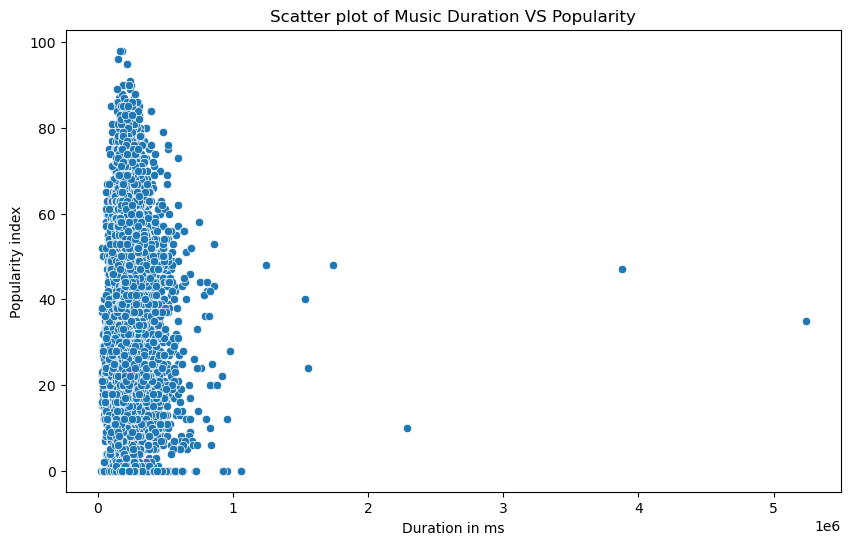

In [15]:
# duration_ms VS popularity

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'duration_ms', y = 'popularity', data=df)
plt.title("Scatter plot of Music Duration VS Popularity")
plt.xlabel("Duration in ms")
plt.ylabel("Popularity index")
plt.show()


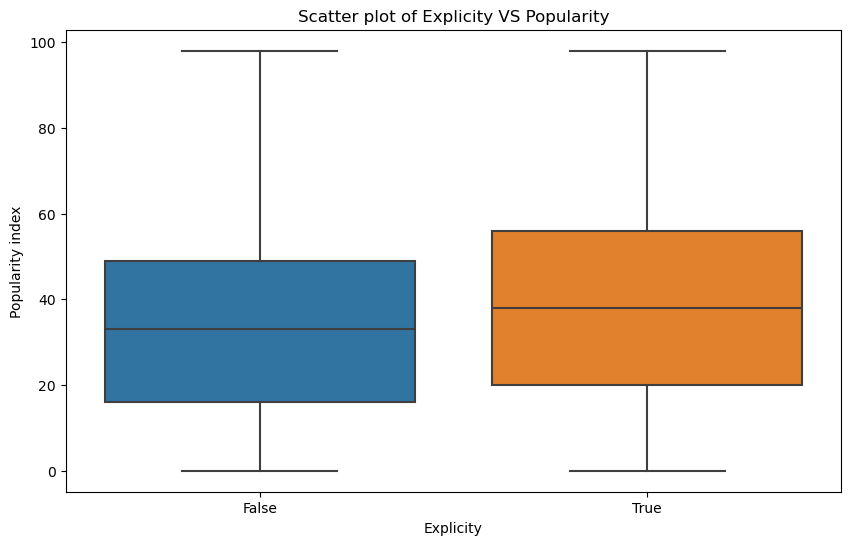

In [16]:
# explicit vs popularity

plt.figure(figsize=(10,6))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Scatter plot of Explicity VS Popularity')
plt.xlabel('Explicity')
plt.ylabel('Popularity index')
plt.show()

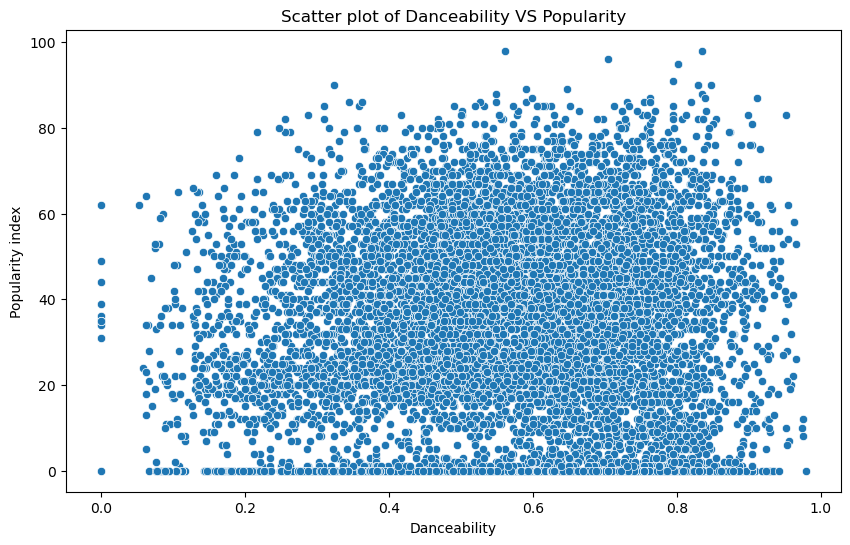

In [17]:
# danceability VS popularity
# danceability: a measure describing how suitable a track is for dancing based on rhythm stability, beat strength, 
# and overall regularity

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'danceability', y='popularity', data = df)
plt.title('Scatter plot of Danceability VS Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity index')
plt.show()

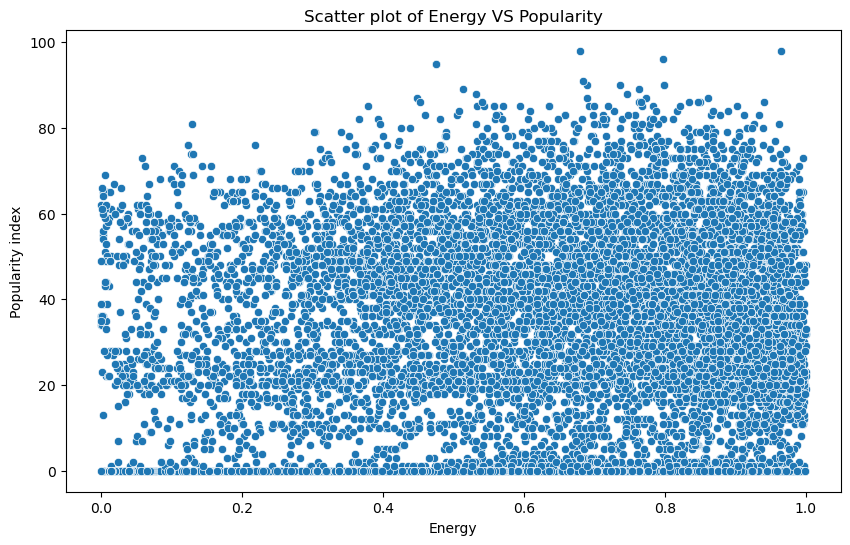

In [18]:
# energy vs popularity
# energy: a mesure that represents the intensity and activity of a track. High-energy tracks are usually 
# fast, loud, and noisy (e.g., EDM, rock).

plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Scatter plot of Energy VS Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity index')
plt.show()

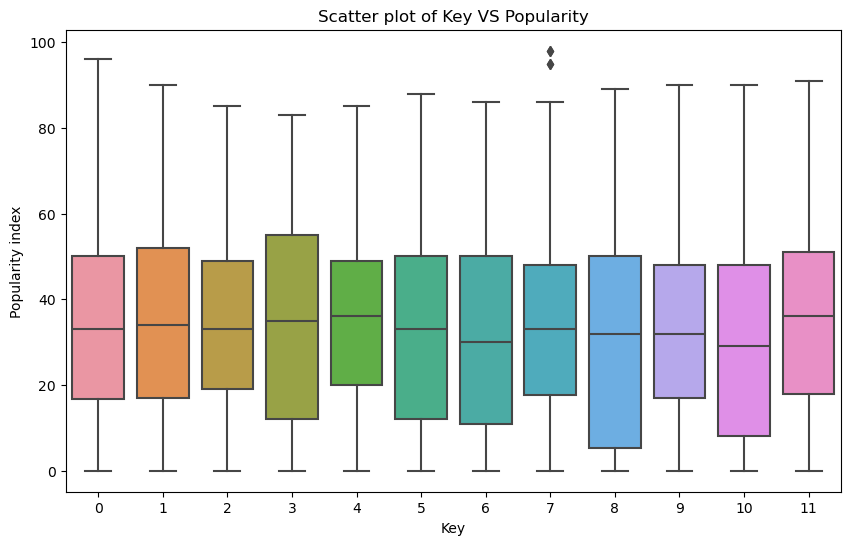

In [19]:
# key vs popularity
# key: The musical key of the track (ranging from 0 to 11), where 0 corresponds to the key of C, 
# 1 corresponds to C#/Db, and so on.

plt.figure(figsize=(10,6))
sns.boxplot(x='key', y='popularity', data=df)
plt.title('Scatter plot of Key VS Popularity')
plt.xlabel('Key')
plt.ylabel('Popularity index')
plt.show()

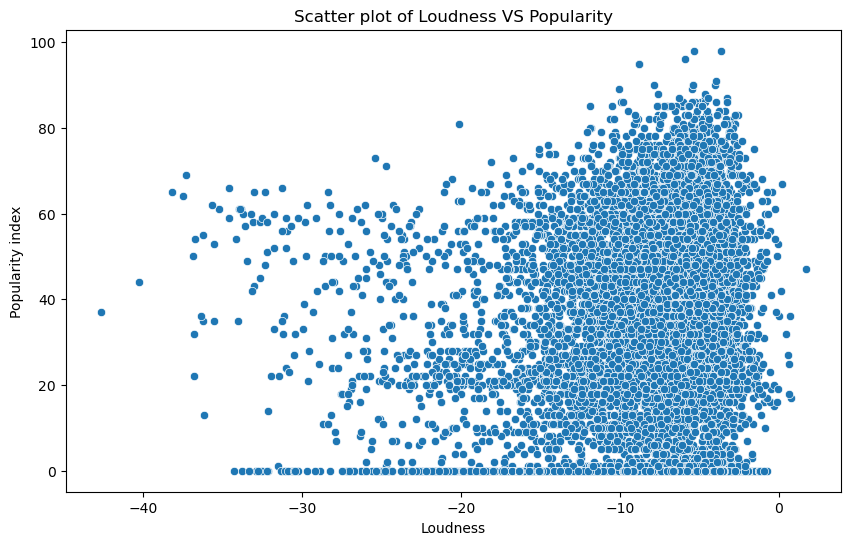

In [20]:
# loudness vs popularity

plt.figure(figsize=(10,6))
sns.scatterplot(x='loudness', y='popularity', data=df)
plt.title('Scatter plot of Loudness VS Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity index')
plt.show()

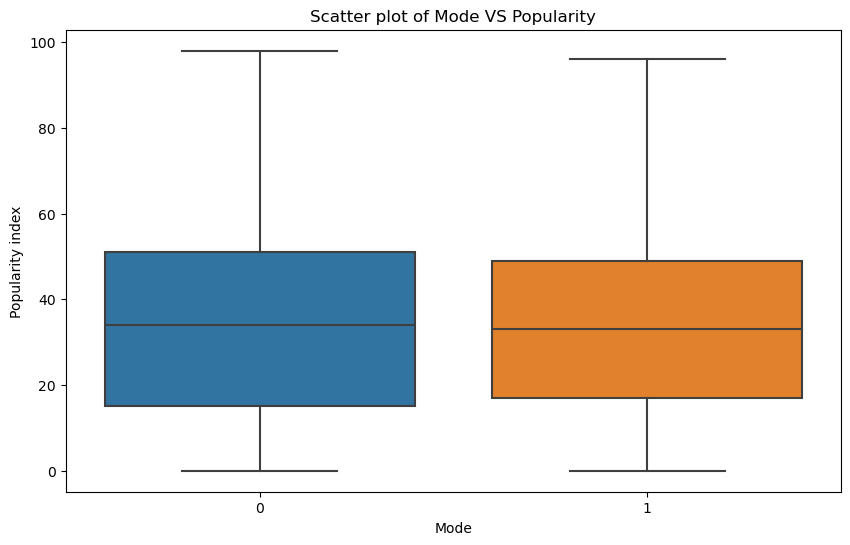

In [21]:
# mode vs popularity
# mode: 1 represents major mode, 0 represents minor mode 

plt.figure(figsize=(10,6))
sns.boxplot(x='mode', y='popularity', data=df)
plt.title('Scatter plot of Mode VS Popularity')
plt.xlabel('Mode')
plt.ylabel('Popularity index')
plt.show()

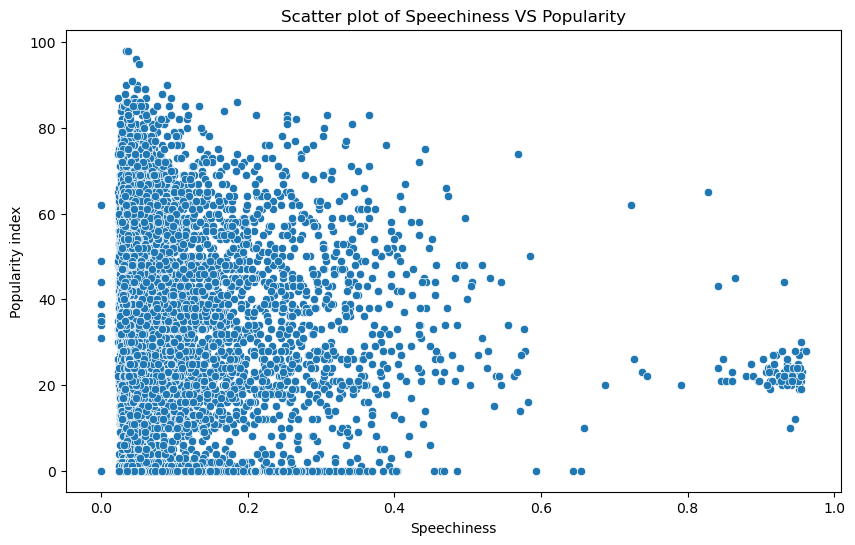

In [22]:
# speechiness vs popularity
# speechiness: the presence of spoken words

plt.figure(figsize=(10,6))
sns.scatterplot(x='speechiness', y='popularity', data=df)
plt.title('Scatter plot of Speechiness VS Popularity')
plt.xlabel('Speechiness')
plt.ylabel('Popularity index')
plt.show()

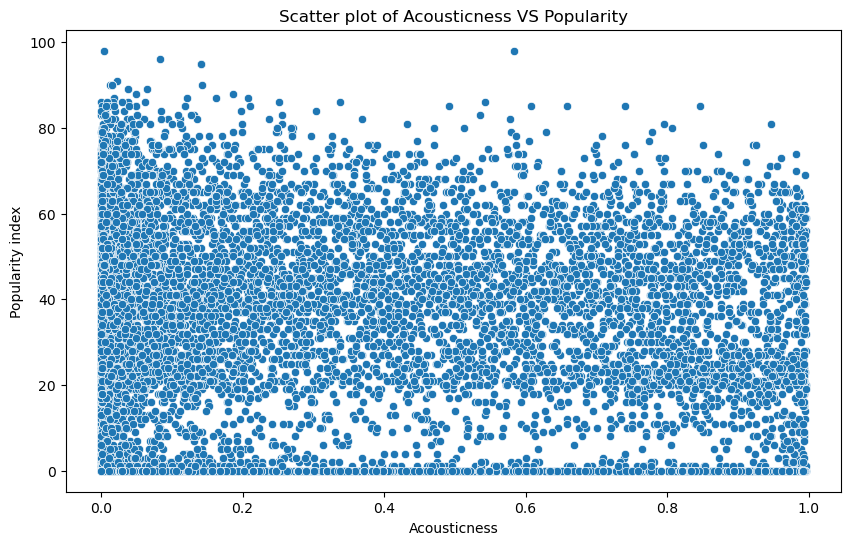

In [23]:
# acousticness vs popularity
# acousticness: little electronic processing 

plt.figure(figsize=(10,6))
sns.scatterplot(x='acousticness', y='popularity', data=df)
plt.title('Scatter plot of Acousticness VS Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity index')
plt.show()

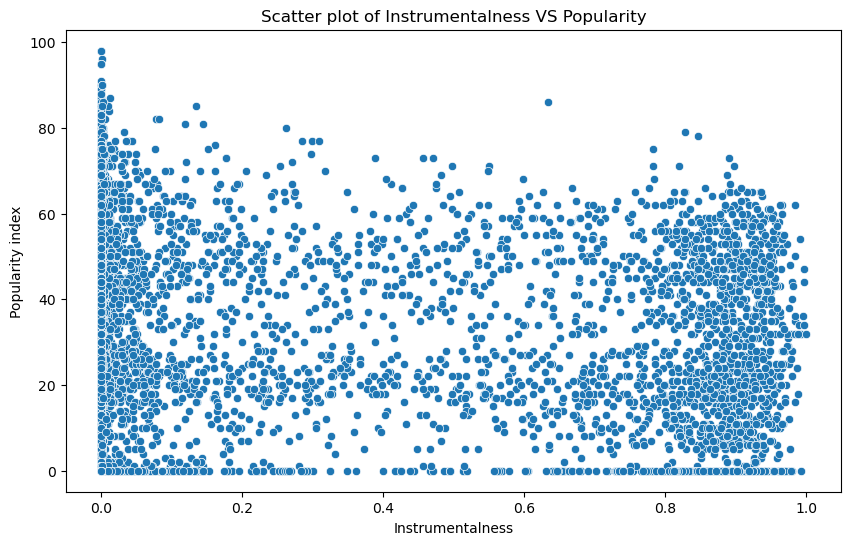

In [24]:
# instrumentalness vs popularity
# higher value of instrumentalness, more likey to be instrumental

plt.figure(figsize=(10,6))
sns.scatterplot(x='instrumentalness', y='popularity', data=df)
plt.title('Scatter plot of Instrumentalness VS Popularity')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity index')
plt.show()

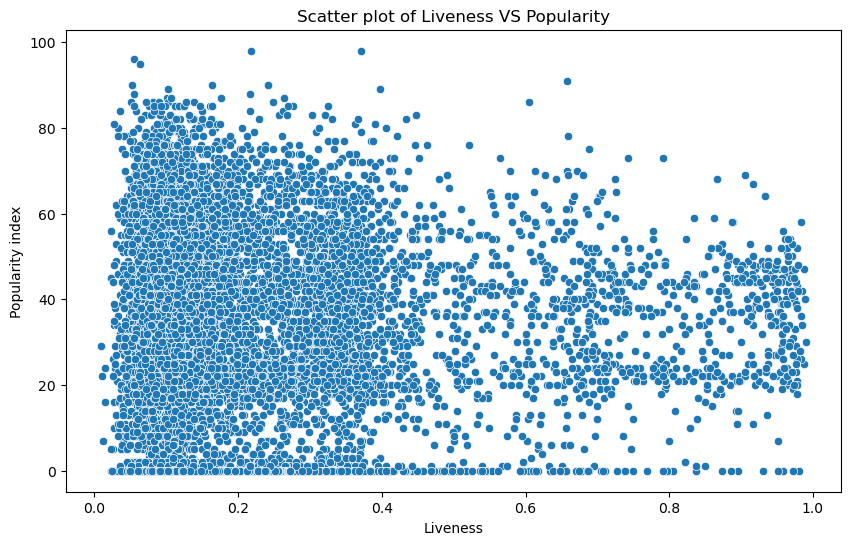

In [25]:
# liveness vs popularity
# live: indicates live performance singing

plt.figure(figsize=(10,6))
sns.scatterplot(x='liveness', y='popularity', data=df)
plt.title('Scatter plot of Liveness VS Popularity')
plt.xlabel('Liveness')
plt.ylabel('Popularity index')
plt.show()

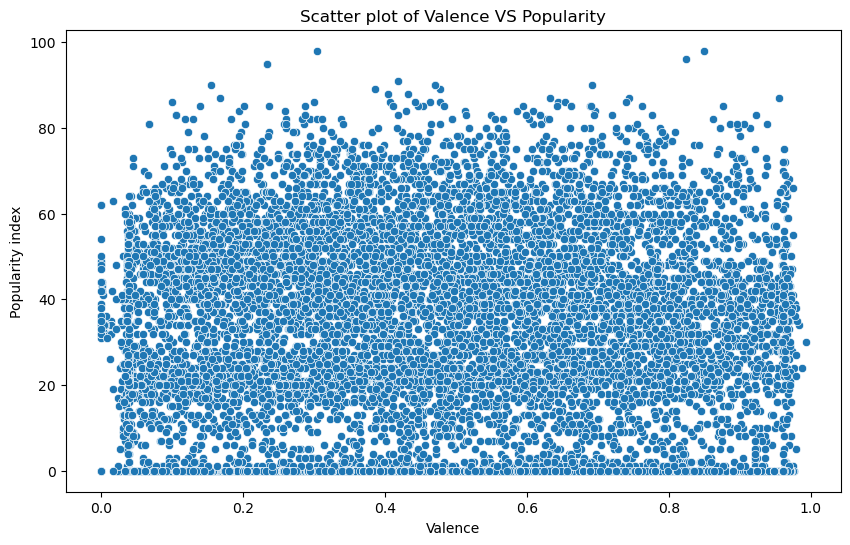

In [26]:
# valence vs popularity
# valence: describing the musical positivity conveyed by a track. 
# Tracks with high valence sound more positive (e.g., happy, cheerful), 
# while tracks with low valence sound more negative (e.g., sad, angry).

plt.figure(figsize=(10,6))
sns.scatterplot(x='valence', y='popularity', data=df)
plt.title('Scatter plot of Valence VS Popularity')
plt.xlabel('Valence')
plt.ylabel('Popularity index')
plt.show()

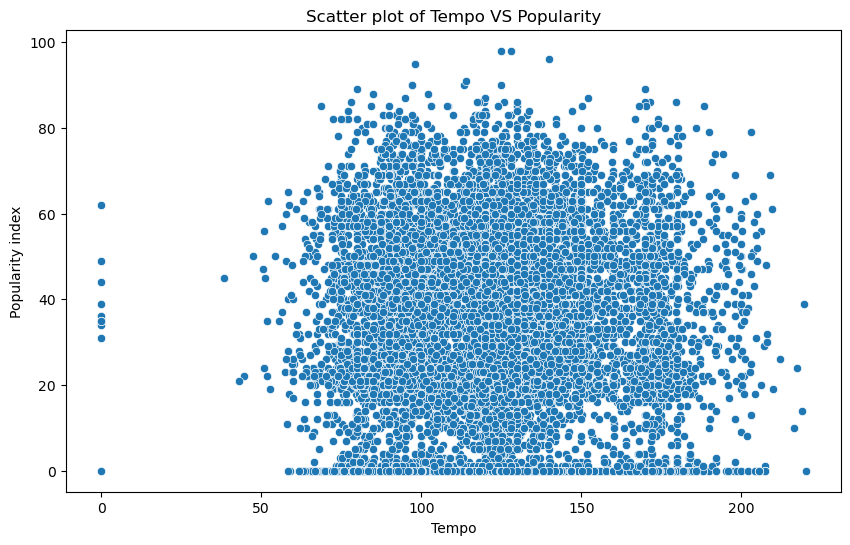

In [27]:
# tempo vs popularity
# tempo: The overall tempo of the track, measured in beats per minute (BPM)

plt.figure(figsize=(10,6))
sns.scatterplot(x='tempo', y='popularity', data=df)
plt.title('Scatter plot of Tempo VS Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity index')
plt.show()

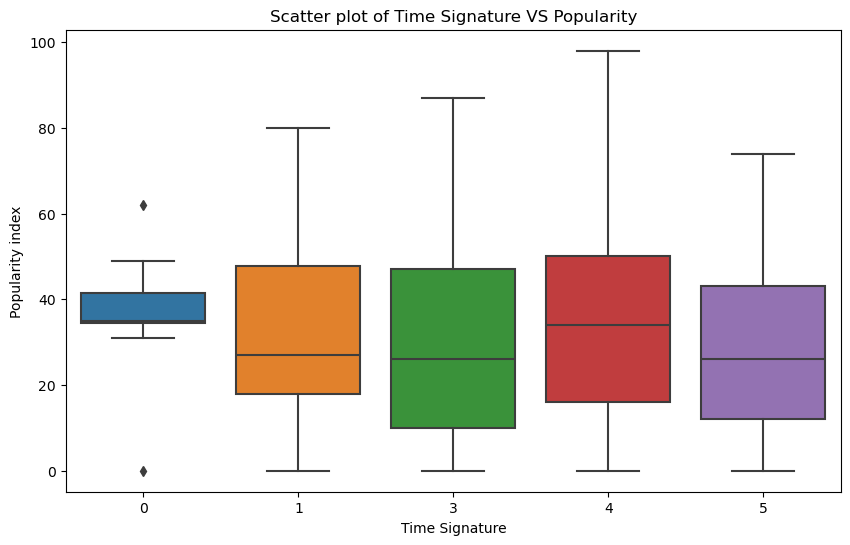

In [28]:
# time_signature vs popularity
# An integer representing the number of beats in a bar of music. Common values include 3 (waltz), 
# 4 (most pop and rock music), etc.

plt.figure(figsize=(10,6))
sns.boxplot(x='time_signature', y='popularity', data=df)
plt.title('Scatter plot of Time Signature VS Popularity')
plt.xlabel('Time Signature')
plt.ylabel('Popularity index')
plt.show()

4.2 Visualizing Categorical Variables

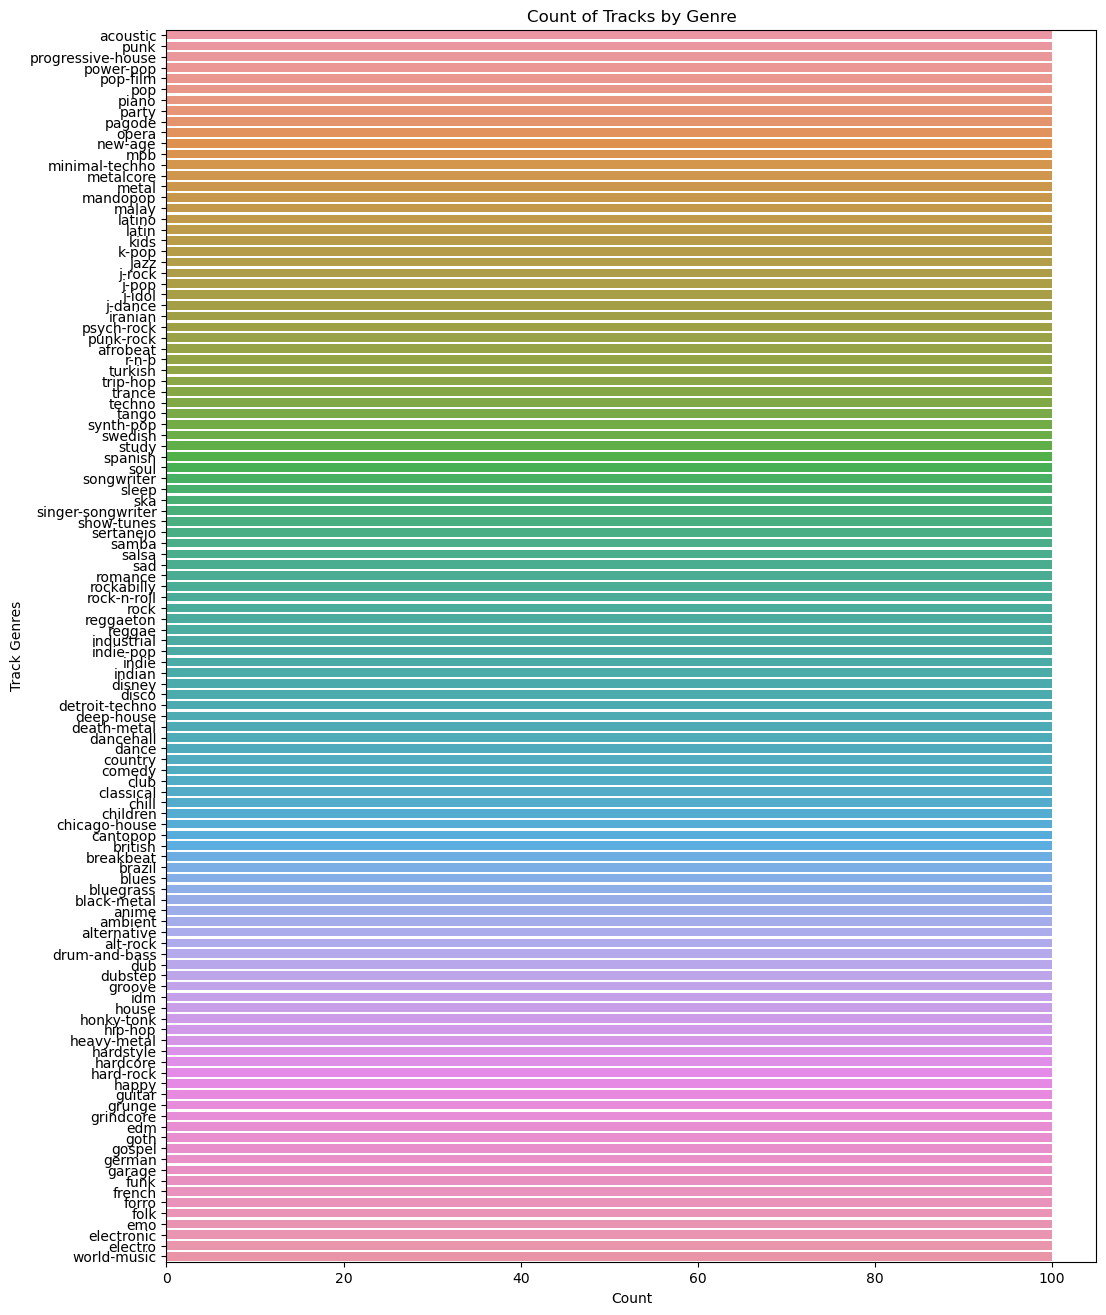

In [29]:
# track_genre

plt.figure(figsize=(12,16))
sns.countplot(y='track_genre', data=df, order=df['track_genre'].value_counts().index)
plt.title('Count of Tracks by Genre')
plt.xlabel('Count')
plt.ylabel('Track Genres')
plt.show()

In [30]:
df['track_genre'].nunique()

114

: There are 114 different track genres, each with 1000 tracks

4.3 Correlation Matrix

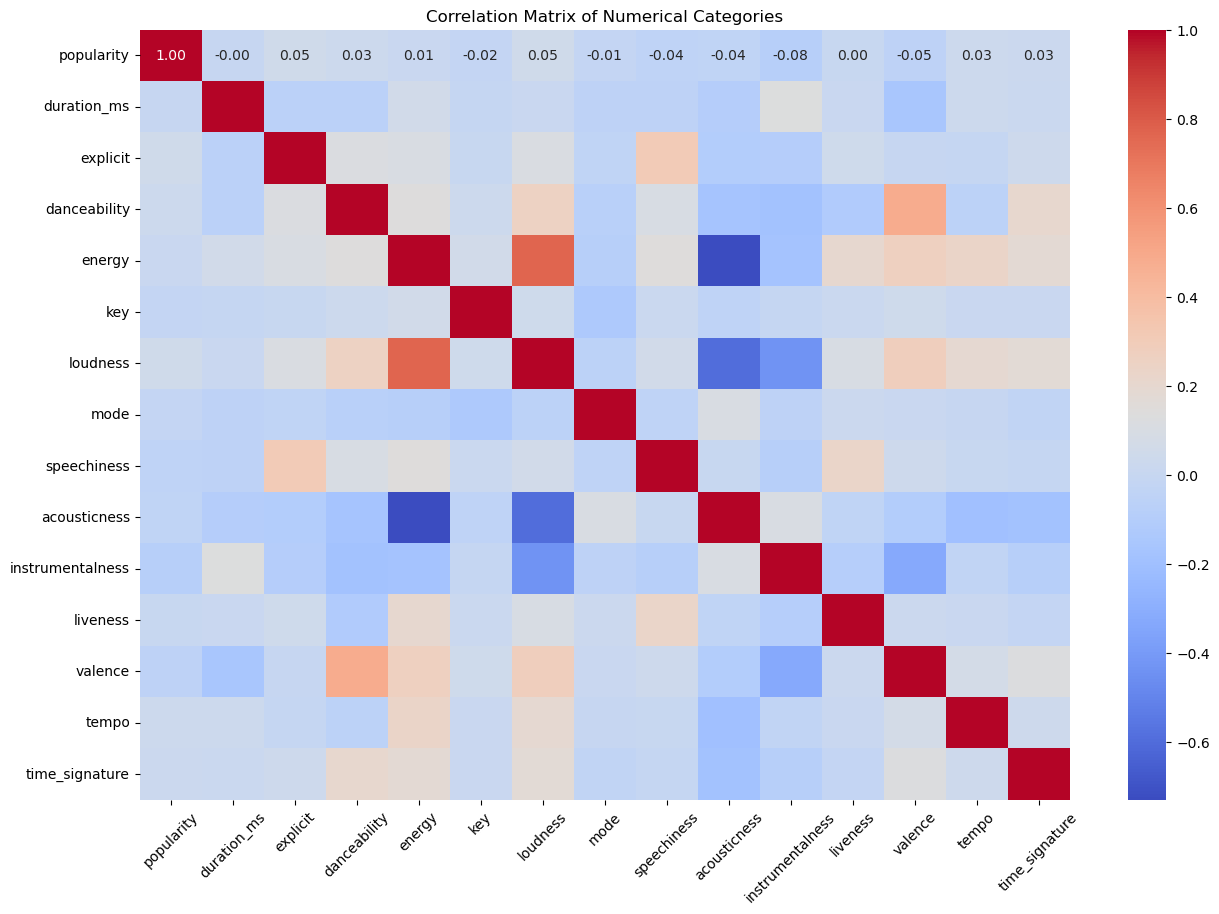

In [31]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.xticks(rotation=45) 
plt.title("Correlation Matrix of Numerical Categories")
plt.show()

4.4 Visualizing Target Variable (popularity) Distribution

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


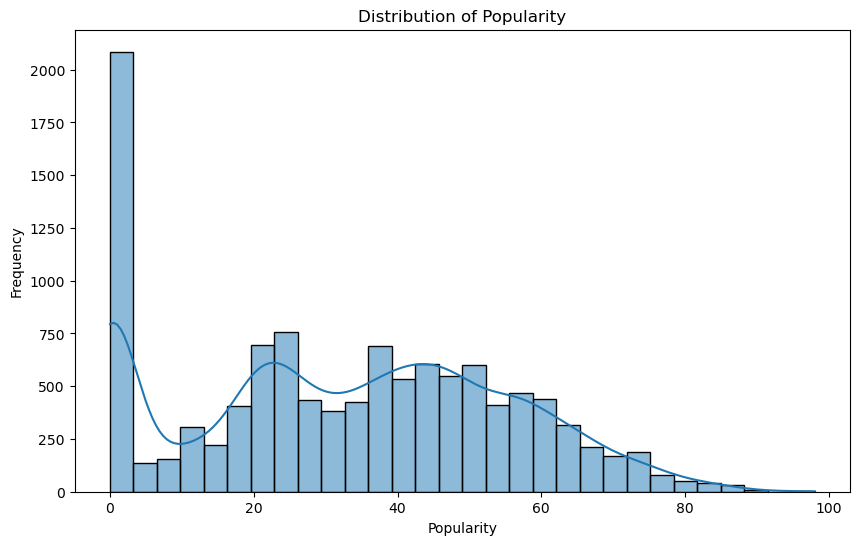

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

5. Data Preprocessing

5.1 Encode Categorical Variables
- to convert categorical variables (artists, album_name, track_genre) into numerical format using One-Hot Encoding
- One-Hot Encoding is chosen because the 3 columns are nomical data (no inherent order). This is to prevent the mode from assuming any ordinal relationship (ranks) in the data

In [33]:
df = pd.get_dummies(df, columns=['artists', 'album_name', 'track_genre'], drop_first=True)

In [34]:
len(df.columns)

15642

5.2 Feature Scaling
- Normalize or standardize numerical features to ensure they contribute equally to the model

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo']
df[numerical_features]= scaler.fit_transform(df[numerical_features])

6. Split the data

6.1 Train-Test Split
- Split the dataset into training and testing sets to evaluate the model's performance

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(['popularity', 'track_id',  'track_name'], axis=1)  # Features
y = df['popularity']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Model Selection

7.1 Linear regression

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

7.2 Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

7.3 Extra Tree Regressor

In [39]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

8. Predictions

8.1 Prediction of the models

In [40]:
lr_predictions = model.predict(X_test)
rf_predictions = rf.predict(X_test)
et_predictions = et.predict(X_test) 

8.2 Metrics Evaluation

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

lr_metrics = evaluate_model(y_test, lr_predictions)
rf_metrics = evaluate_model(y_test, rf_predictions)
et_metrics = evaluate_model(y_test, et_predictions)

print("Linear Regression Metrics:", lr_metrics)
print("Random Forest Metrics:", rf_metrics)
print("Extra Trees Metrics:", et_metrics)

Linear Regression Metrics: (2619667321.234273, 1.4318031492182159e+20, -2.938267137345511e+17)
Random Forest Metrics: (13.230733918128655, 324.3319799122807, 0.33442387056712664)
Extra Trees Metrics: (10.95125, 306.38181276315794, 0.37126020960781414)


In conclusion, the Extra Trees Regression Model is the best prediction model based on the evaluation metrics.
It has the lowest MAE and MSE, and the highest R2 score, indicating that it provides the best balance of low error and high predictive power compared to the other two models.

Linear Regression model has very poor performance because:
- relationship between features and target variable is non-linear and too complex
- no meaningful relationships captured